In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import geopy
import folium
import numpy as np
from sklearn.cluster import KMeans

In [7]:
df = pd.read_csv('data.csv')
df.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [13]:
df_toronto = df[df.Borough.str.contains('Toronto')]
df_toronto

,Postal Code,Borough,Neighborhood,Latitude,Longitude
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
24,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
25,M6G,Downtown Toronto,Christie,43.669542,-79.422564
30,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
31,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259


In [16]:
df_toronto.reset_index(drop=True,inplace=True)

In [45]:
geolocator = geopy.geocoders.Nominatim(user_agent='hanyacontohemail@gmail.com')
_, (latitude, longitude) = geolocator.geocode("Toronto")

In [121]:
toronto_map = folium.Map([latitude,longitude],zoom_start=12)

In [122]:
toronto_map

In [123]:
for Borough, Neighborhood, lat, long in zip(df_toronto.Borough, df_toronto.Neighborhood, 
                                            df_toronto.Latitude, df_toronto.Longitude):
    label = folium.Popup(f'{Borough}, {Neighborhood}')
    folium.CircleMarker([lat,long],
                        fill_color='b',
                        radius=7,
                        fill_opacity=0.5,
                       popup=label).add_to(toronto_map)
    

In [124]:
toronto_map

In [136]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_toronto[['Latitude','Longitude']])
clust_labels = kmeans.predict(df_toronto[['Latitude','Longitude']])
cent = kmeans.cluster_centers_

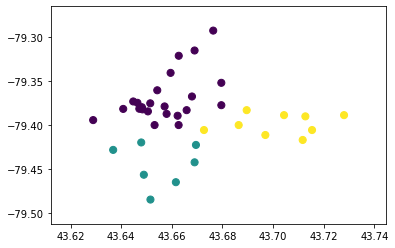

In [137]:
plt.scatter(df_toronto['Latitude'],df_toronto['Longitude'],c=clust_labels,s=50)

In [142]:
color = ['#009933','#0000ff','#ff0000']

In [143]:
for Borough, Neighborhood, lat, long ,type_ in zip(df_toronto.Borough, df_toronto.Neighborhood, 
                                            df_toronto.Latitude, df_toronto.Longitude,clust_labels):
    label = folium.Popup(f'{Borough}, {Neighborhood}')
    folium.CircleMarker([lat,long],
                        radius=7,
                        fill_opacity=0.5,
                        color = color[type_],
                        popup=label).add_to(toronto_map)

In [144]:
toronto_map